In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math, seaborn

In [63]:
train = pd.read_csv('repairedTrain.csv')

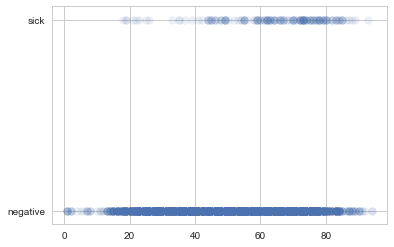

In [64]:
plt.scatter(train['age'], train['class'], alpha=0.1, s=60)

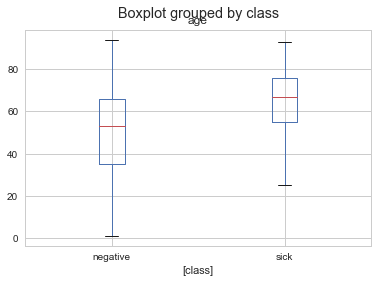

In [65]:
train[['class', 'age']].boxplot(by='class')

SEX - occupation

In [66]:
pom = pd.crosstab(index=train["sex"], columns=train["occupation"])

pom

occupation   Adm-clerical   Armed-Forces   Craft-repair   Exec-managerial  \
sex                                                                         
F                     431              0             35               218   
M                      40              1            172               112   

occupation   Farming-fishing   Handlers-cleaners   Machine-op-inspct  \
sex                                                                    
F                         10                  18                 107   
M                         28                  50                  67   

occupation   Other-service   Prof-specialty   Protective-serv   Sales  \
sex                                                                     
F                      339              262                 8     188   
M                       87              109                24     108   

occupation   Tech-support   Transport-moving  Priv-house-serv  
sex                                                            
F                      58                 20               22  
M                      27                 51                0

From the cross tab between sex and occupation it seems that there are some relations between females to be Adm-clerical
but we can check further with the rest of the atributes

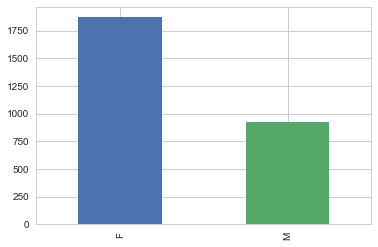

In [67]:
train['sex'].value_counts().plot.bar();

In [68]:

pom = pd.crosstab(index= train["psych"], columns= train["personal_info"])
pom

personal_info  Husband  Not-in-family  Other-relative  Own-child  Unmarried  \
psych                                                                         
f                  510            850              80        474        470   
t                   41             39               6         11         23   

personal_info  Wife  
psych                
f               290  
t                 5

The relation between personal_info and sex seems quite reasonable and we can directly take and fill the missing vlaues of the sex column

In [69]:

pom = pd.crosstab(index= train["psych"], columns= train["pregnant"])
pom

pregnant     f   t
psych             
f         2634  40
t          124   1

There is also a relation between pregnant and sex so that if the row contains pregnant as ture then the sex should be female

In [70]:
pom = pd.crosstab(index=train["sex"], columns=train["occupation"])

pom

occupation   Adm-clerical   Armed-Forces   Craft-repair   Exec-managerial  \
sex                                                                         
F                     431              0             35               218   
M                      40              1            172               112   

occupation   Farming-fishing   Handlers-cleaners   Machine-op-inspct  \
sex                                                                    
F                         10                  18                 107   
M                         28                  50                  67   

occupation   Other-service   Prof-specialty   Protective-serv   Sales  \
sex                                                                     
F                      339              262                 8     188   
M                       87              109                24     108   

occupation   Tech-support   Transport-moving  Priv-house-serv  
sex                                                            
F                      58                 20               22  
M                      27                 51                0

There seems to be a relationship between Craft-repair and Males

In [71]:
pom = pd.crosstab(index= train["sex"], columns=train["referral source"])

pom

referral source  Other  STMW  SVHC  SVHD  SVI  other
sex                                                 
F                  128    81   127    23  454   1058
M                   41    10   148     8  316    405

In [72]:
train.psych.value_counts()

f    2674
t     125
Name: psych, dtype: int64

In [73]:
pom = pd.crosstab(index= train["psych"], columns= train["pregnant"])
pom

pregnant     f   t
psych             
f         2634  40
t          124   1

In [74]:
pom = pd.crosstab(index= train["psych"], columns= train["marital-status"])
pom


marital-status   Divorced   Married-AF-spouse   Married-civ-spouse  \
psych                                                                
f                     483                   3                  823   
t                      27                   0                   46   

marital-status   Married-spouse-absent   Never-married   Separated   Widowed  
psych                                                                         
f                                   36            1081         107       141  
t                                    0              38           7         7

In [75]:
pom = pd.crosstab(index= train["psych"], columns= train["personal_info"])
pom

personal_info  Husband  Not-in-family  Other-relative  Own-child  Unmarried  \
psych                                                                         
f                  510            850              80        474        470   
t                   41             39               6         11         23   

personal_info  Wife  
psych                
f               290  
t                 5

There seems to be reasonable relations between psych and husband, wife and Own-child

In [76]:

pom = pd.crosstab(index= train["psych"], columns= train["personal_info"])
pom


personal_info  Husband  Not-in-family  Other-relative  Own-child  Unmarried  \
psych                                                                         
f                  510            850              80        474        470   
t                   41             39               6         11         23   

personal_info  Wife  
psych                
f               290  
t                 5

Na základe týchto distribúcii sa dá povedať, že od 55 rokov do 85 majú ľudia najčastejšie chorobu

### Na základe dole uvádzaných atribútov zisťujeme ich pomery ku chorobe, ktoré sa budú môcť použiť pre pravidlá.<br>Čím sú počty t a f rôznejšie, tým môže byť výpočet menej dôveryhodný kvôli náhode. 

# query on thyroxin

In [77]:
pom = pd.crosstab(index=train["query on thyroxine"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

1.7245508982035929


class  negative  sick
f          2592   167
t            36     4

#### Tí, čo majú theroxin true, sú náchylnejší k chorobe o 72% v porovnaní s f, [40] t

# on antithyroid medication

In [78]:
pom = pd.crosstab(index=train["on antithyroid medication"], columns=train["class"])
pom.index= ["f","t"]
pom

class  negative  sick
f          2594   171
t            34     0

#### Ľudia ktorí sa liečia na antithyroid, niesú chorý, [34] t

# sick

In [79]:
pom = pd.crosstab(index=train["sick"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

3.242966751918159


class  negative  sick
f          2536   153
t            92    18

#### Tí, čo sú sick, sú náchylnejší k chorobe až o 224% v porovnaní s f, [110] t

# pregnant

In [80]:
pom = pd.crosstab(index=train["pregnant"], columns=train["class"])
pom.index= ["f","t"]
pom

class  negative  sick
f          2587   171
t            41     0

# T3 and T3 measured

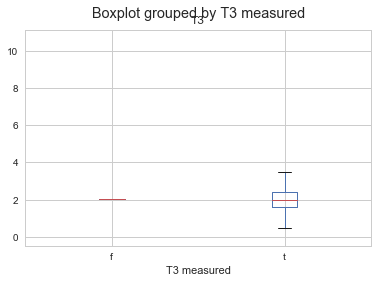

In [81]:
train.boxplot(column="T3",by="T3 measured")

In [82]:
train["T3"].mean()

2.024977416440862

In [83]:
train['T3'].isnull().sum()

0

As we can see there is a large gap and missing values in the T3 column
so we could fill them by it's mean value as it seems reasonable from the box-plot

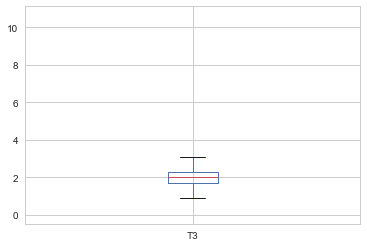

In [84]:
train.boxplot(column='T3')

# Histogram for T3 and T3 measured
Histograms are good for visualizing numerical data with it's related numerical data from which we can see mean, median and mode of the column easily as in the following histogram

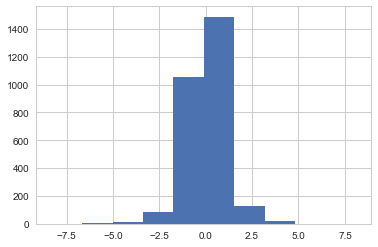

In [85]:
train["T3"].diff().hist()

Histogram seems one of the best visualisation tool for Categorical-numerical atributes

# Scatter Matrix Plot
Categorical data—frequency data is most often
presented in tables, and analyses using loglinear models and
logistic regression are most often presented in terms of parameter
estimates.

so far there are a number of data visualization techniques, so commonly used for quantitative data, have
begun to be developed for frequency data.
we can draw scatterplot matrices to determine if there is  a linear correlation between multiple variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212DEA2E5C0>,
      dtype=object)

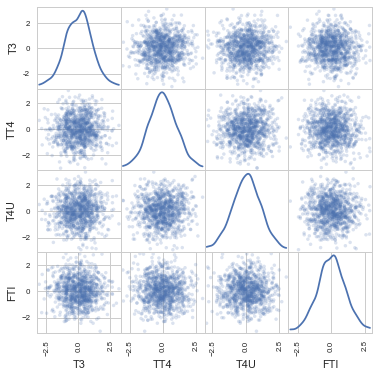

In [86]:
 from pandas.plotting import scatter_matrix

 x= pd.DataFrame(np.random.randn(1000, 4), columns=['T3', 'TT4', 'T4U', 'FTI'])

 scatter_matrix(x, alpha=0.2, figsize=(6, 6), diagonal='kde')



# TT4 and TT4 measured
histogram of TT4 with it related categorical TT$ measured data to show linead to visualize linear relationship wich then we can use to fill or clear data or for futher usages

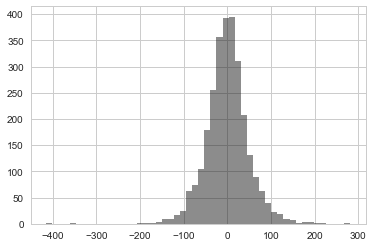

In [87]:
train["TT4"].diff().hist(color='k', alpha=0.5, bins=50)

In [88]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:
x = responsible value to the y axis
y = the value in the T3 column 
To show analytic details of the columns 

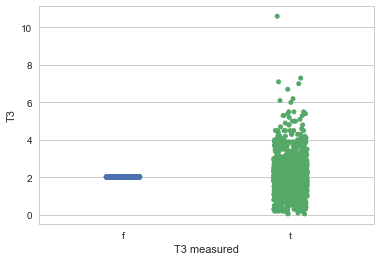

In [89]:
sns.stripplot(x="T3 measured", y="T3", data= train, jitter=True);

The bar chart represents the categorical data with it's correspoing rectangular values to show us which gender and age people have what kind of class whether sick or negative

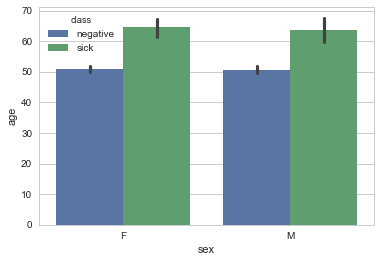

In [90]:
sns.barplot(x="sex", y="age", hue="class", data=train);

Because of the generalized API of the categorical plots, they should be easy to apply to other more complex contexts. For example, they are easily combined with a PairGrid to show categorical relationships across several different variables:

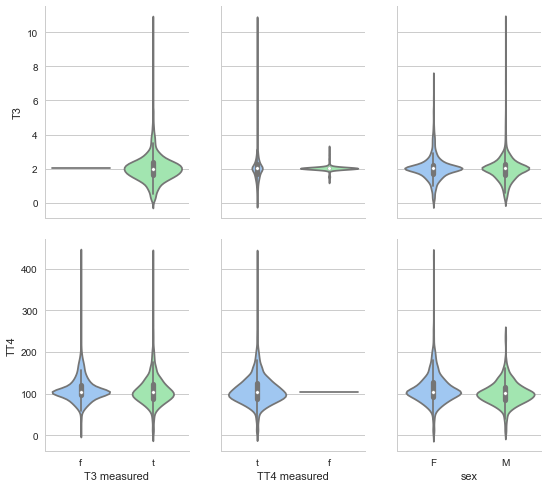

In [91]:
g = sns.PairGrid(train,
                 x_vars=["T3 measured", "TT4 measured", "sex"],
                 y_vars=["T3", "TT4"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

# Referral source

we can represent the data of the referral source with age and sex to represent to see if we can find any relationships in between

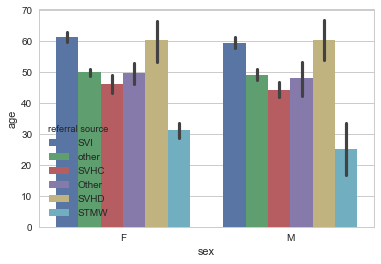

In [92]:
sns.barplot(x="sex", y="age", hue="referral source", data= train);

Frequency of referral source in comparison with it's frequency

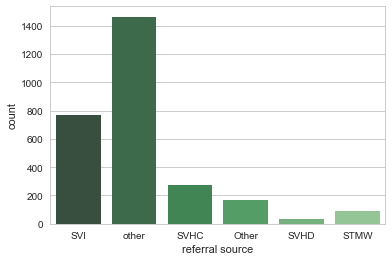

In [93]:
sns.countplot(x="referral source", data= train, palette="Greens_d");

# thyroid surgery

In [94]:
pom = pd.crosstab(index=train["thyroid surgery"], columns=train["class"])
pom.index= ["f","t"]
pom

class  negative  sick
f          2589   171
t            39     0

#### Ľudia s thyroid surgery niesú chorý, [39] t

# I131 treatment

In [95]:
pom = pd.crosstab(index=train["I131 treatment"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['f'] / pom['negative']['f'])/(pom['sick']['t'] / pom['negative']['t']))
pom

3.095699341340566


class  negative  sick
f          2581   170
t            47     1

#### Tí čo sa neliečia na I131, majú 209% väčšiu náchylnosť k chorobe v porovnaní s t, [48] t

# query hypothyroid

In [96]:
pom = pd.crosstab(index=train["query hypothyroid"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

2.3016718380956793


class  negative  sick
f          2485   151
t           143    20

#### Tí čo majú query hypothyroid, sú o 130% náchylnejší k chorobe v porovnaní s f, [163] t

# query hyperthyroid

In [97]:
pom = pd.crosstab(index=train["query hyperthyroid"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['f'] / pom['negative']['f'])/(pom['sick']['t'] / pom['negative']['t']))
pom

2.2673170731707315


class  negative  sick
f          2460   166
t           168     5

#### Tí, čo nemajú hyperthyroid, sú 126% náchylnejší v porovnaní s t, [173] t

# lithium

In [98]:
pom = pd.crosstab(index=train["lithium"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

1.1832579185520362


class  negative  sick
f          2615   170
t            13     1

#### Tento samostatný atribút nemá žiadny vplyv na chorobu (t o 18% viac - to je o náhode), (jedine vtedy by mal, ak by sa vzťahoval k iným vplyvnejším atribútom) [14] t

# goitre

In [99]:
pom = pd.crosstab(index=train["goitre"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

1.3403653202984307


class  negative  sick
f          2605   169
t            23     2

#### Opäť ako v minulom atribúte, tento atribút nemá vplyv na chorobu (t o 34% viac - stále málo, [25] t

# tumor

In [100]:
pom = pd.crosstab(index=train["tumor"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['f'] / pom['negative']['f'])/(pom['sick']['t'] / pom['negative']['t']))
pom

4.6520719311962475


class  negative  sick
f          2558   170
t            70     1

#### Tí, čo nemajú tumor, sú 365% náchylnejší k chorobe v porovnaní s f [71] t

# hypopituitary

In [101]:
pom = pd.crosstab(index=train["hypopituitary"], columns=train["class"])
pom.index= ["f","t"]
pom

class  negative  sick
f          2628   170
t             0     1

#### Je tu len jeden človek čo mal hypopituitary a mal chorobu, vzhľadom na malý počet ľudí s chorobou to môže byť dobrý prediktor [1] t

# TSH measured

In [102]:
pom = pd.crosstab(index=train["TSH measured"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

10.157289002557546


class  negative  sick
f           282     2
t          2346   169

#### Tí, čo majú zmerané TSH, sú 915% krát náchylnejší k chorobe v porovnaní s f [284] f

# Workclass and occupation

theose who have workclass private don't have Adm-occupation

In [103]:
pom = pd.crosstab(index= train["workclass"], columns= train["occupation"])
pom

occupation          Adm-clerical   Armed-Forces   Craft-repair  \
workclass                                                        
 Federal-gov                  24              1              2   
 Local-gov                    46              0              9   
 Private                     356              0            165   
 Self-emp-inc                  5              0              3   
 Self-emp-not-inc             12              0             27   
 State-gov                    27              0              1   
 Without-pay                   1              0              0   

occupation          Exec-managerial   Farming-fishing   Handlers-cleaners  \
workclass                                                                   
 Federal-gov                     15                 1                   1   
 Local-gov                        9                 1                   3   
 Private                        240                18                  64   
 Self-emp-inc                    21                 0                   0   
 Self-emp-not-inc                28                16                   0   
 State-gov                       17                 1                   0   
 Without-pay                      0                 1                   0   

occupation          Machine-op-inspct   Other-service   Prof-specialty  \
workclass                                                                
 Federal-gov                        1               5               11   
 Local-gov                          1              28               74   
 Private                          170             352              204   
 Self-emp-inc                       0               4               12   
 Self-emp-not-inc                   2              26               31   
 State-gov                          0              11               39   
 Without-pay                        0               0                0   

occupation          Protective-serv   Sales   Tech-support   Transport-moving  \
workclass                                                                       
 Federal-gov                      1       3              2                  2   
 Local-gov                       15       0              2                  7   
 Private                          9     251             74                 57   
 Self-emp-inc                     0      13              0                  2   
 Self-emp-not-inc                 0      26              1                  2   
 State-gov                        7       3              6                  1   
 Without-pay                      0       0              0                  0   

occupation         Priv-house-serv  
workclass                           
 Federal-gov                     0  
 Local-gov                       0  
 Private                        22  
 Self-emp-inc                    0  
 Self-emp-not-inc                0  
 State-gov                       0  
 Without-pay                     0

# Workclass and Marital-status




In [104]:
pom = pd.crosstab(index= train["workclass"], columns= train["marital-status"])
pom

marital-status      Divorced   Married-AF-spouse   Married-civ-spouse  \
workclass                                                               
 Federal-gov              24                   0                   14   
 Local-gov                43                   0                   66   
 Never-worked              0                   0                    0   
 Private                 370                   2                  579   
 Self-emp-inc              6                   0                   39   
 Self-emp-not-inc         20                   0                   99   
 State-gov                24                   0                   25   
 Without-pay               0                   0                    1   

marital-status      Married-spouse-absent   Never-married   Separated  \
workclass                                                               
 Federal-gov                            0              22           2   
 Local-gov                              3              61           6   
 Never-worked                           0               1           0   
 Private                               21             829          91   
 Self-emp-inc                           0              12           1   
 Self-emp-not-inc                       4              33           4   
 State-gov                              5              49           5   
 Without-pay                            0               0           0   

marital-status      Widowed  
workclass                    
 Federal-gov              7  
 Local-gov               16  
 Never-worked             0  
 Private                 90  
 Self-emp-inc             2  
 Self-emp-not-inc        11  
 State-gov                5  
 Without-pay              1

As we couldn't find any reasonable and beneficial relationship among the workclass and the rest categorical atributes which is 
our priority in filling and clearing missing data in a dataset .
we can use the classic recommended data filling techniques to fill the missing data for example mode, mean or median

In [105]:
train["workclass"].mode()



0     Private
dtype: object

In [106]:
pom = pd.crosstab(index= train["workclass"], columns= train["race"])
pom

race               Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
workclass                                                                     
 Federal-gov                        1                   0     16      1     51
 Local-gov                          3                   1     33      0    158
 Never-worked                       0                   0      0      0      1
 Private                           18                  66    246     13   1639
 Self-emp-inc                       0                   6      0      0     54
 Self-emp-not-inc                   2                   5      9      0    155
 State-gov                          2                   5     17      0     89
 Without-pay                        0                   0      0      0      2

Occupation class

In [107]:
pom = pd.crosstab(index= train["occupation"], columns= train["class"])
pom

class               negative  sick
occupation                        
 Adm-clerical            445    26
 Armed-Forces              1     0
 Craft-repair            194    13
 Exec-managerial         309    21
 Farming-fishing          35     3
 Handlers-cleaners        64     4
 Machine-op-inspct       168     6
 Other-service           410    16
 Prof-specialty          338    33
 Protective-serv          30     2
 Sales                   273    23
 Tech-support             78     7
 Transport-moving         66     5
Priv-house-serv           22     0

Country

In [108]:
pom = pd.crosstab(index= train["Country"], columns= train["sex"])
pom

sex                            F    M
Country                              
Cambodia                       0    1
Canada                         5    2
China                          2    1
Columbia                       5    3
Cuba                           7    1
Dominican-Republic             7    0
El-Salvador                    6    5
England                        7    1
France                         2    0
Germany                       10    2
Greece                         1    1
Guatemala                      3    0
Haiti                          3    0
Hong                           1    0
India                          3    6
Iran                           3    5
Ireland                        1    0
Italy                          6    1
Jamaica                        6    5
Japan                          3    1
Laos                           1    1
Mexico                        18   24
Nicaragua                      1    2
Outlying-US(Guam-USVI-etc)     3    0
Peru                           4    1
Philippines                   18    3
Poland                         1    1
Portugal                       2    2
Puerto-Rico                   10    4
Scotland                       2    0
South                          5    1
Taiwan                         4    2
Thailand                       2    1
Trinadad&Tobago                2    0
United-States               1699  833
Vietnam                        5    2

# FTI measured

In [109]:
pom = pd.crosstab(index=train["FTI measured"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

4.118049615055603


class  negative  sick
f           290     5
t          2338   166

Categorical scatterplots
It’s also possible to add a nested categorical variable with the hue parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables:

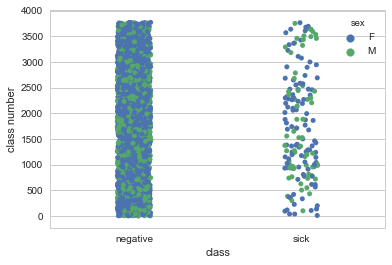

In [110]:
sns.stripplot(x="class", y="class number", hue = "sex", data= train,jitter = True);

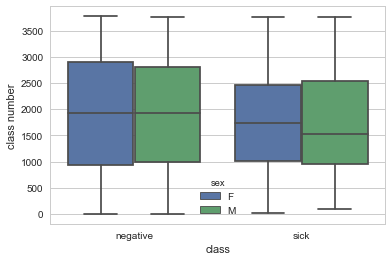

In [111]:
sns.boxplot(x="class", y="class number" , hue="sex", data= train);

# Z nasledujúcich grafov je vidieť, že medzi všetkými kombináciami atribútov uvedených v argumente niesú žiadne veľké korelácie

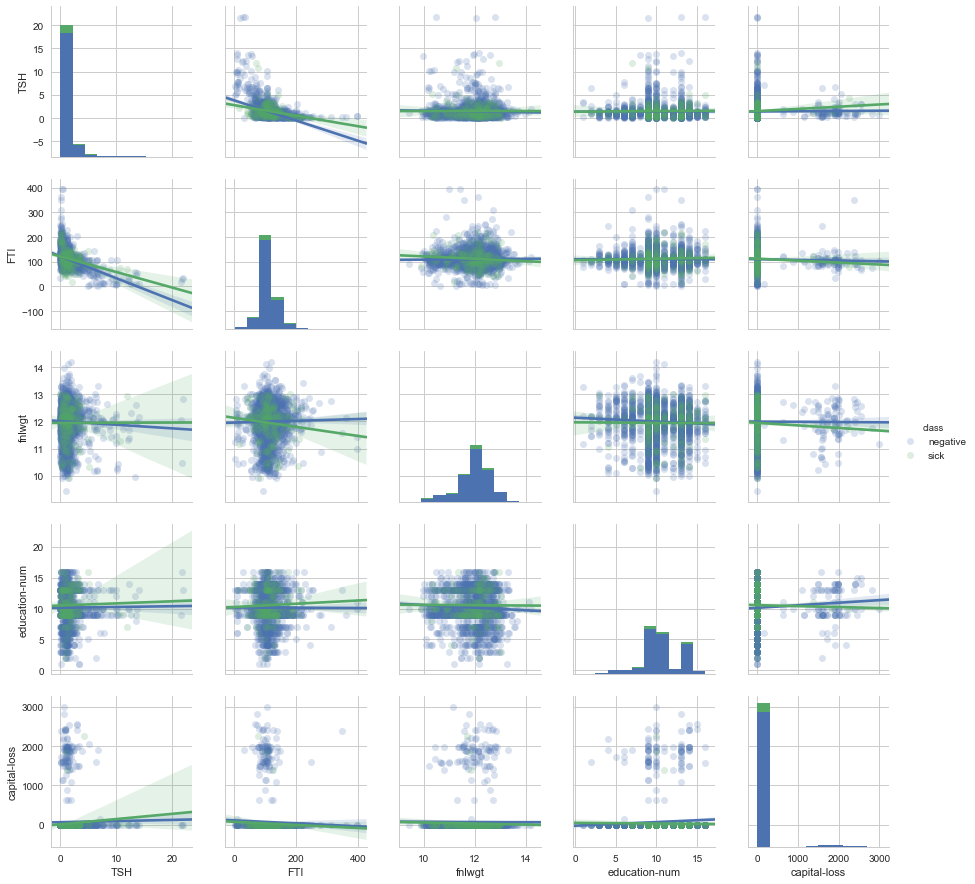

In [112]:
sns.pairplot(train[['TSH', 'FTI', 'fnlwgt','education-num','class', 'capital-loss']], # nie je tu class number a age
                 hue="class", kind='reg', plot_kws={'scatter_kws': {'alpha': 0.2}})

## Skúsime teraz porovnať atribúty meraní 

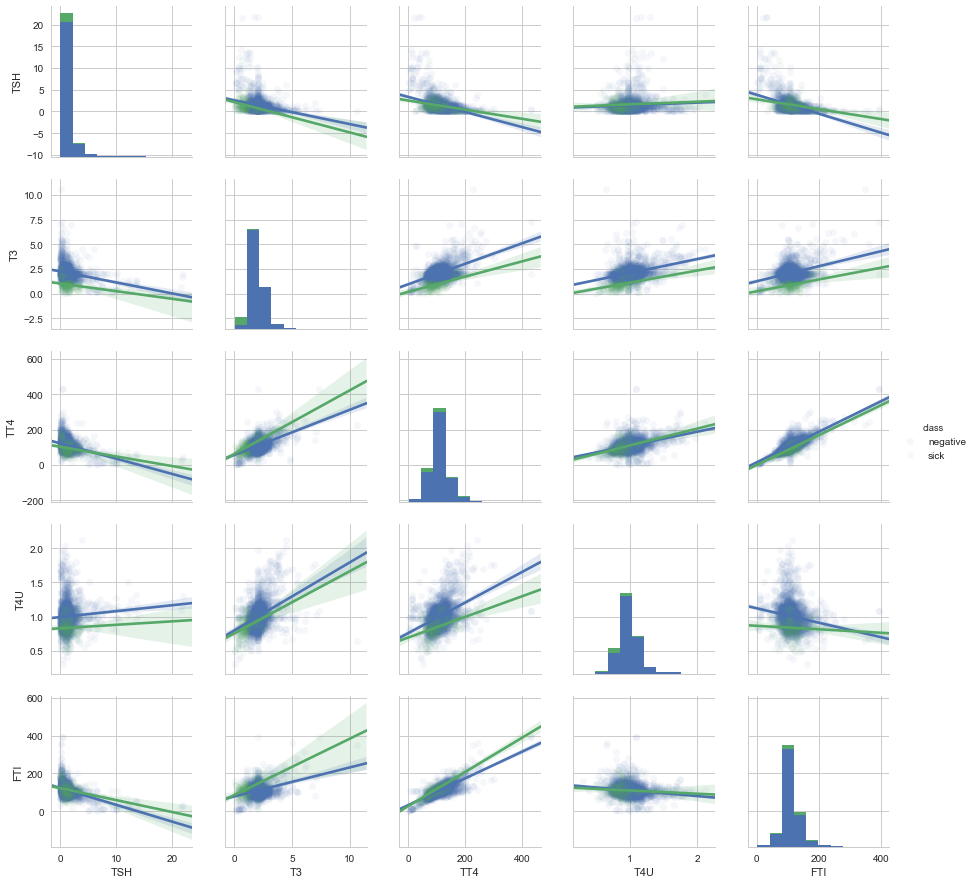

In [113]:
sns.pairplot(train[['TSH', 'T3', 'TT4','T4U','FTI', 'class']], # nie je tu class number a age
                 hue="class", kind='reg', plot_kws={'scatter_kws': {'alpha': 0.05}})

Na vytvorenie pravidiel nám pomôže atribút T3. Grafy v T3 stĺpci grafov je vidieť frekvencie chorých ľudí najmä na ľavej strane.<br>
TT4 == (50;150) & T3 == (0;2)      ---> Sick<br>
T4U == (0,9;0,6) & T3 == (0;2)      ---> Sick<br>
FTI == (50;150) & T3 == (0;2)      ---> Sick<br>

Ešte jeden graf ktorý by pomôcť v pravidlách je (T4U;TSH).<br>
T4U == (0,6;0,9)


### Rozpoloženie číselných hodnôt v závislosti od atribútu class (nieje vidieť žiadny vzťah)

# FTI

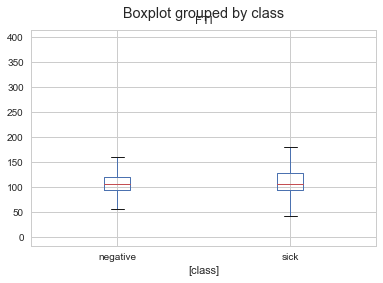

In [114]:
train[['class', 'FTI']].boxplot(by='class')

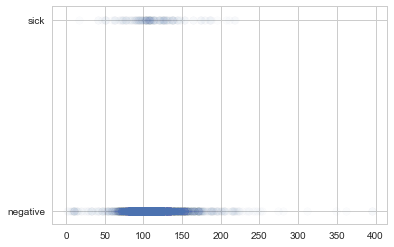

In [115]:
plt.scatter(train['FTI'], train['class'], alpha=0.02, s=60)

### Toto platí aj pre atribúty TSH, fnlwgt, education-num, capital-loss, hours-per-week, class number

# referral source -age- sex


A violin plot has four layers. The outer shape represents all possible results, with thickness indicating how common. (Thus the thickest section represents the mode average.) The next layer inside represents the values that occur 95% of the time. The next layer (if it exists) inside represents the values that occur 50% of the time. The central dot represents the median average value.



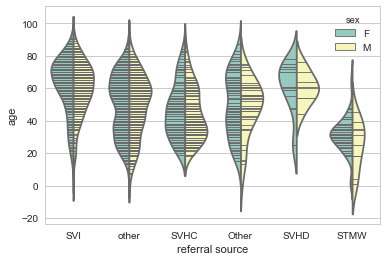

In [116]:
sns.violinplot(x="referral source", y="age", hue="sex", data=train,
               split=True, inner="stick", palette="Set3");

The tickness represents how common the values are, the inside layer presents it's occurency in 95 % of the time, next if exists
50% of the time the central dot presents the median average value 


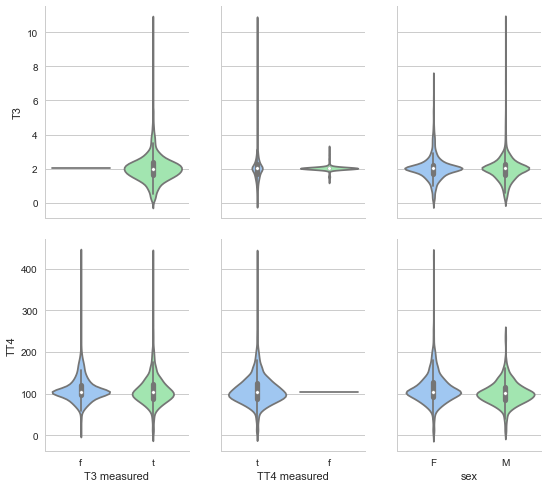

In [117]:
g = sns.PairGrid(train,
                 x_vars=["T3 measured", "TT4 measured", "sex"],
                 y_vars=["T3", "TT4"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

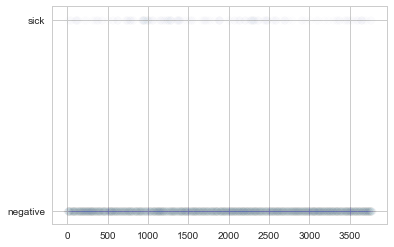

In [118]:
plt.scatter(train['class number'], train['class'], alpha=0.007, s=60)

Visualizing pairwise relationships in a dataset

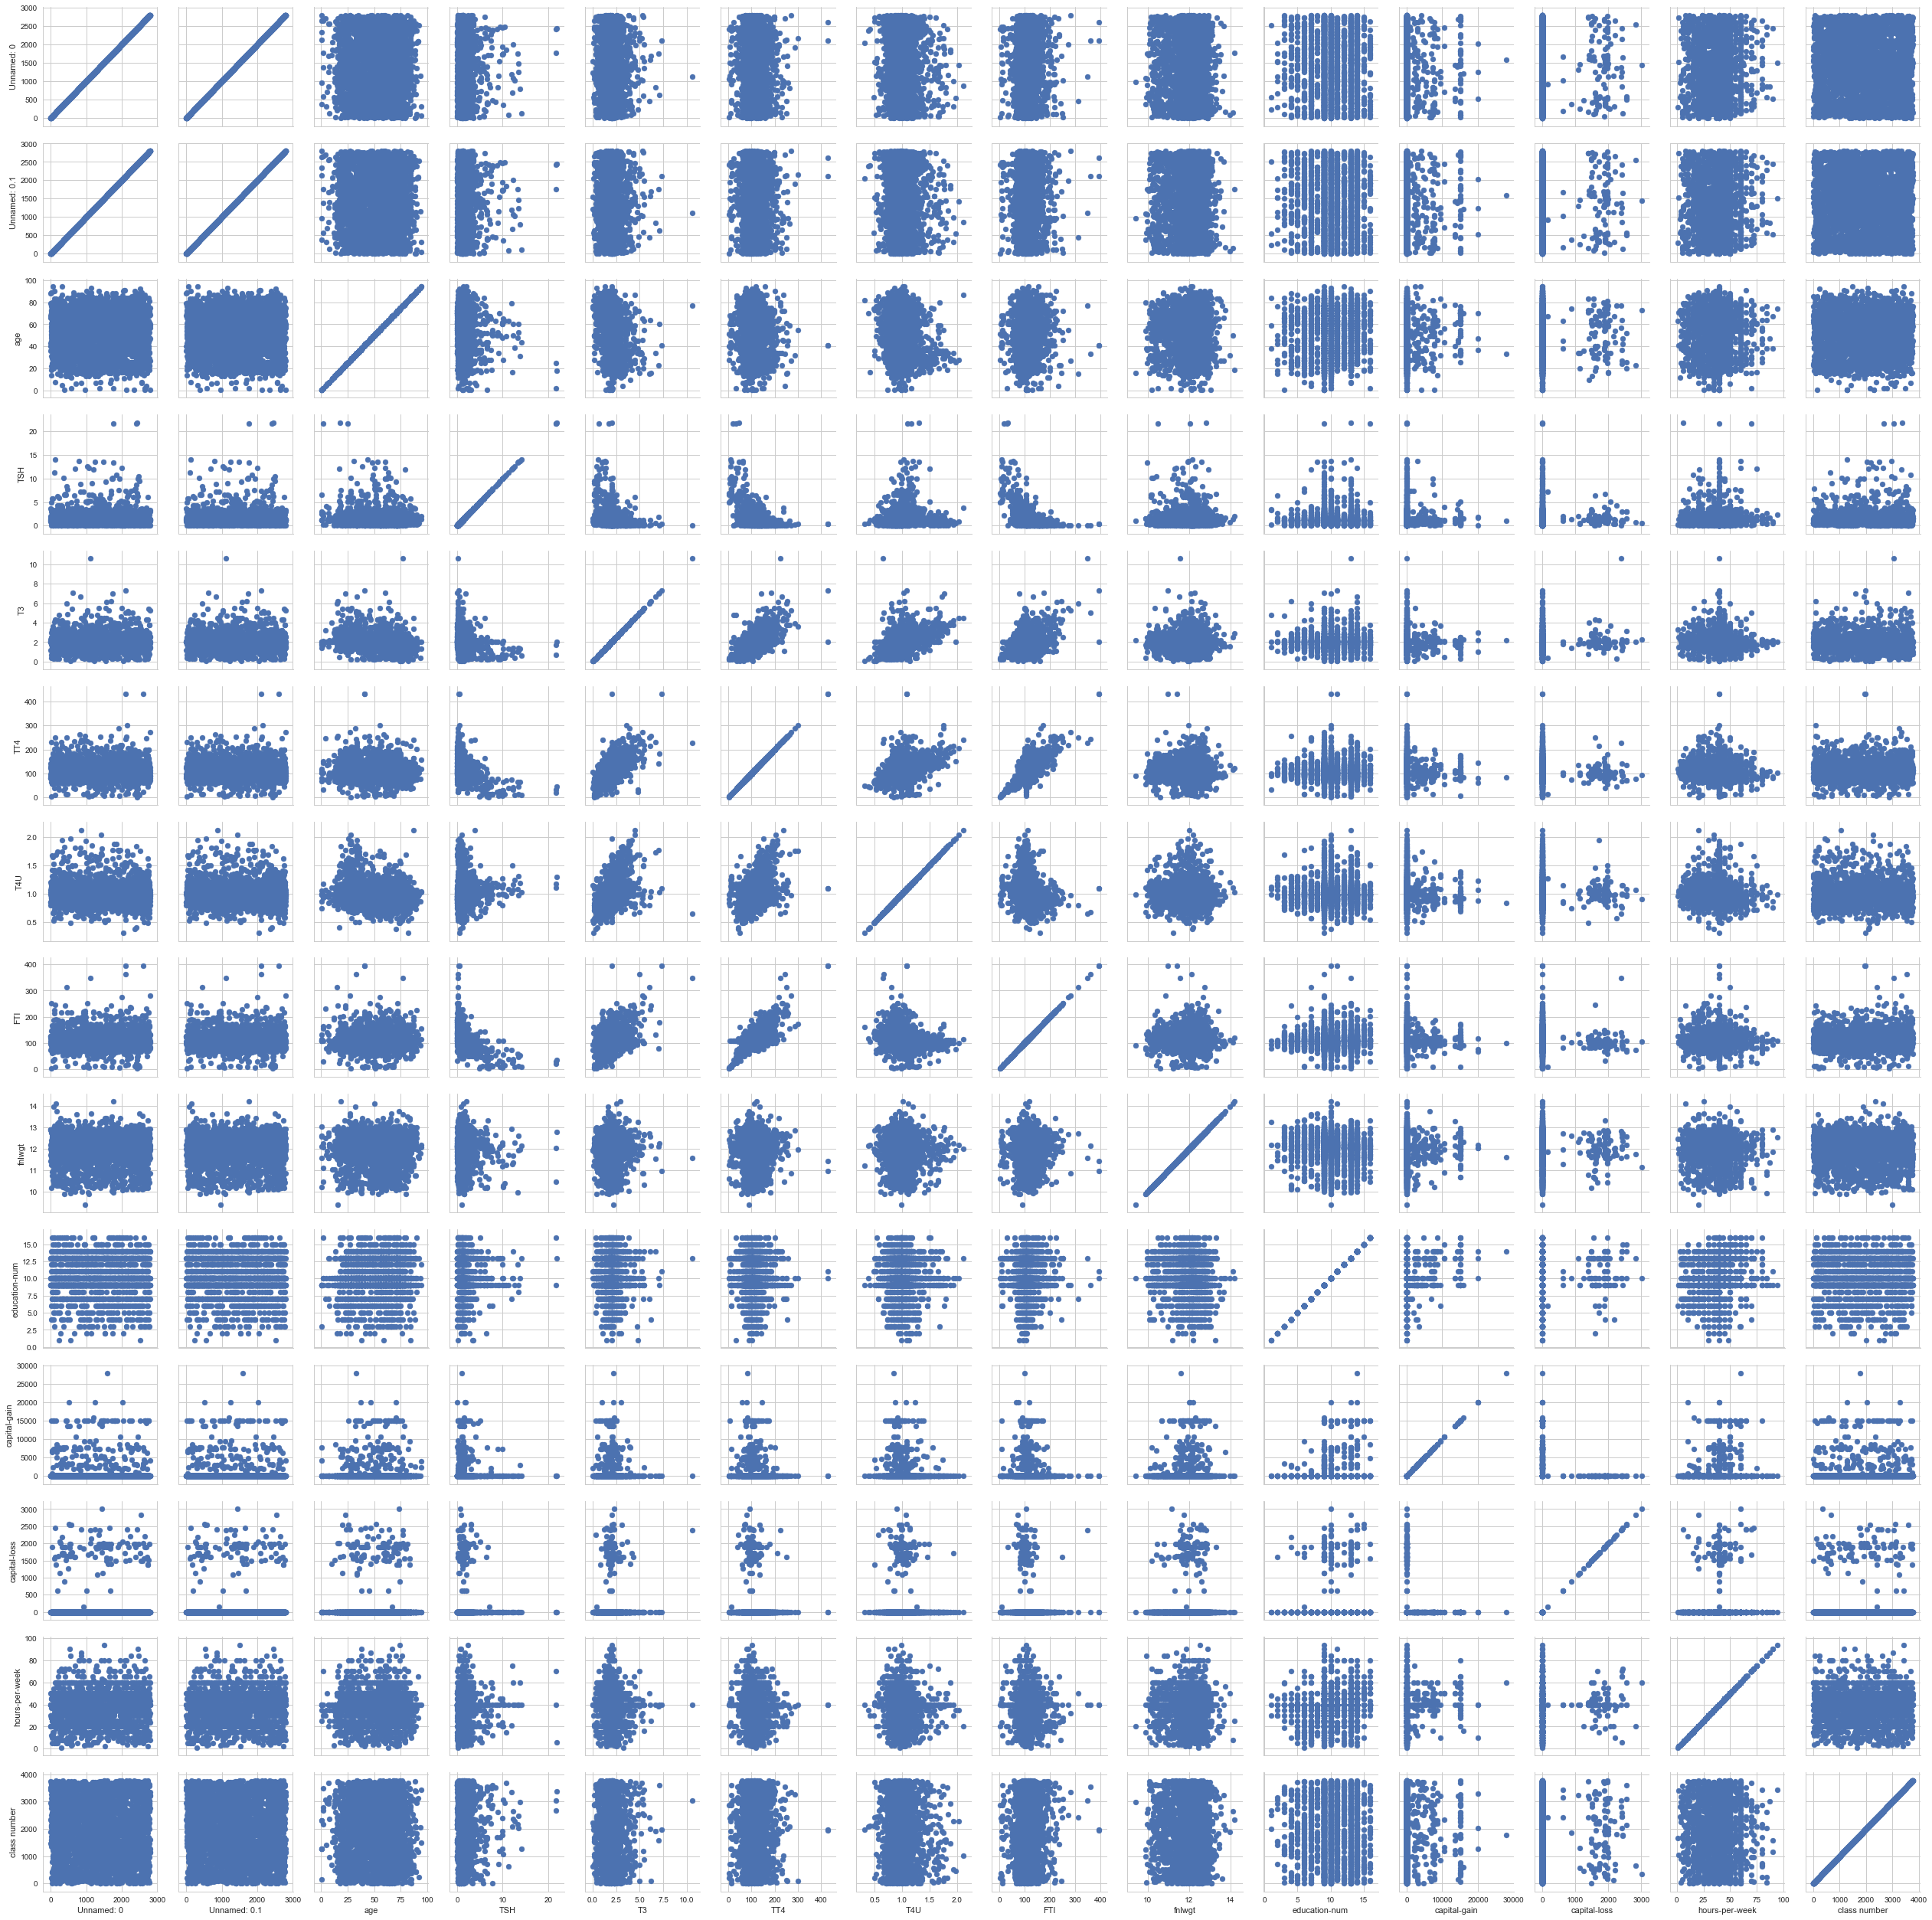

In [119]:
g = sns.PairGrid(train)
g.map(plt.scatter);

Density of T3 in comparison to the age in the dataset
But this is classic method might not be one of the best

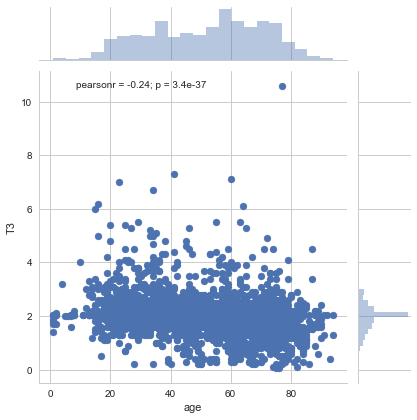

In [120]:
sns.jointplot(x="age", y="T3", data=train);

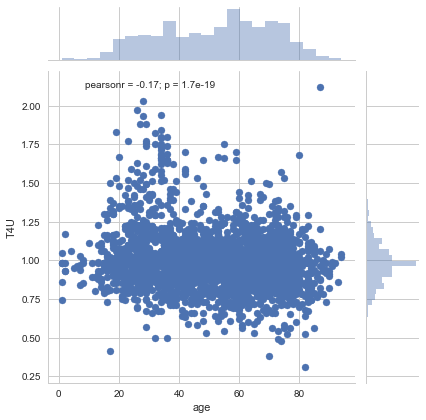

In [121]:
sns.jointplot(x="age", y="T4U", data=train);

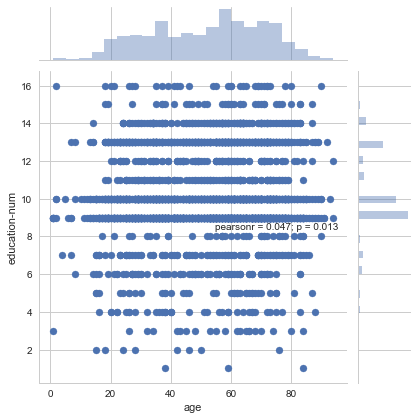

In [122]:
sns.jointplot(x="age", y="education-num", data=train);

Kernel Density distribution

we can use kernel distribution when the parametric distribution cannot properly describe the data, or when you want to avoid making assumptions about the distribution of the data

we couldnt decribe TT4 and age distribtion by the class method so we can use Kernel Density distribution to avoid further error

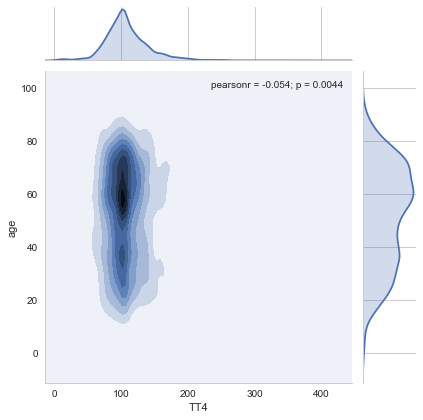

In [123]:
sns.jointplot(x="TT4", y="age", data=train, kind="kde");

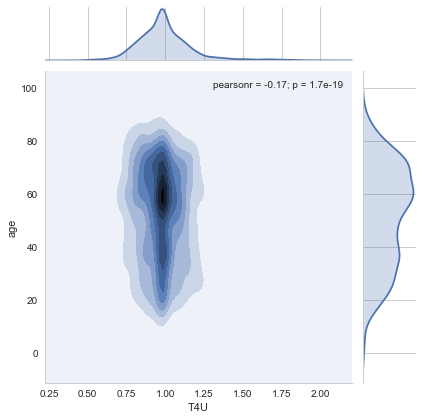

In [124]:
sns.jointplot(x="T4U", y="age", data=train, kind="kde");

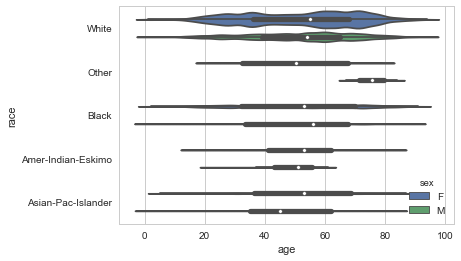

In [125]:
sns.violinplot(x="age", y="race", hue="sex", data=train,
               bw=.1, scale="count", scale_hue=False);

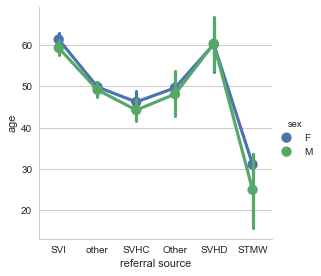

In [126]:
sns.factorplot(x="referral source", y="age", hue="sex", data=train);

age-Education-num and education-status

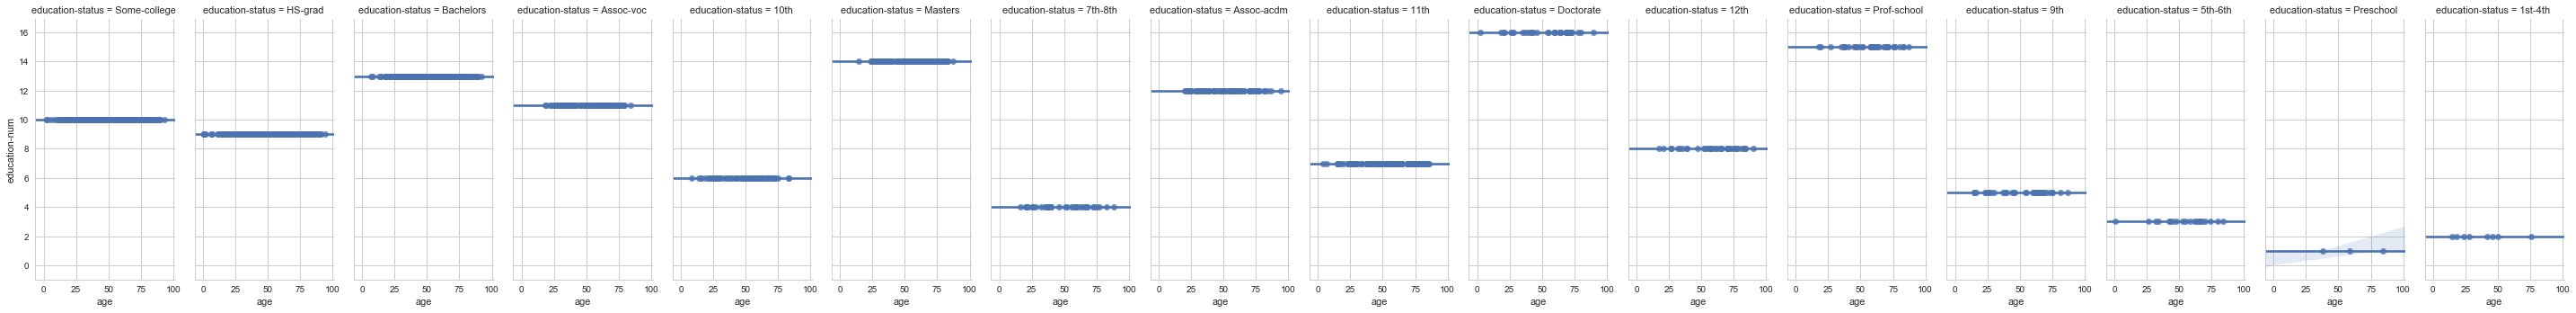

In [127]:
sns.lmplot(x="age", y= "education-num", col="education-status", data=train,
           aspect=.5);

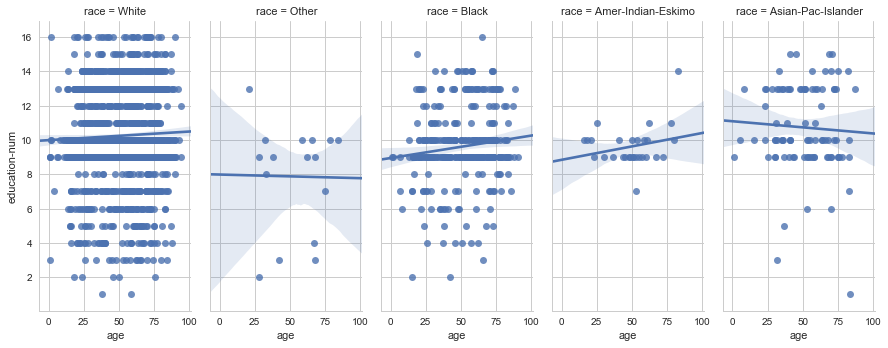

In [128]:
sns.lmplot(x="age", y= "education-num", col="race", data=train,
           aspect=.5);

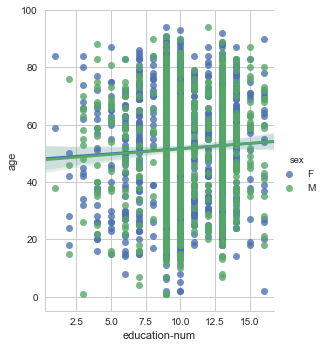

In [129]:
sns.pairplot(train, x_vars=["education-num"], y_vars=["age"],
             hue="sex", size=5, aspect=.8, kind="reg");

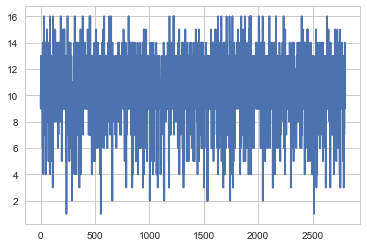

In [130]:
plt.figure()


train['education-num'].plot(x_compat=True)

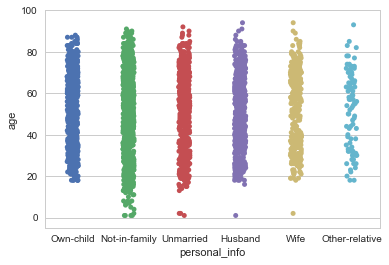

In [131]:
sns.stripplot(x="personal_info", y= "age" , data= train, jitter=True);

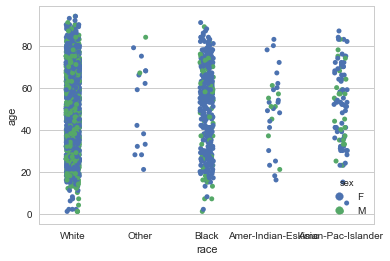

In [132]:
sns.stripplot(x="race", y="age", hue = "sex", data= train,jitter = True);

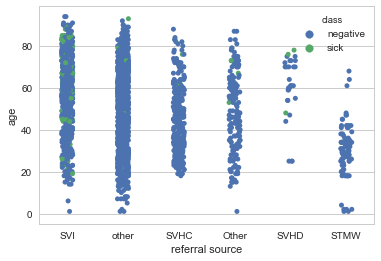

In [133]:
sns.stripplot(x="referral source", y="age", hue = "class", data= train,jitter = True);

In [134]:
pom = train[train['class'] == 'sick']      # len moja pomocka pre pravidla..
pom.iloc[:, 3:20].head()

sex on thyroxine query on thyroxine on antithyroid medication sick  \
15    M            f                  t                         f    f   
61    F            f                  f                         f    f   
72    M            f                  f                         f    f   
96    F            f                  f                         f    f   
129   F            f                  f                         f    f   

    pregnant thyroid surgery I131 treatment query hypothyroid  \
15         f               f              f                 f   
61         f               f              f                 f   
72         f               f              f                 f   
96         f               f              f                 t   
129        f               f              f                 f   

    query hyperthyroid lithium goitre tumor hypopituitary psych TSH measured  \
15                   f       f      f     f             f     f            f   
61                   f       f      f     f             f     f            t   
72                   f       f      f     f             f     f            t   
96                   f       f      f     f             f     t            t   
129                  f       f      f     f             f     f            t   

          TSH  
15   1.183216  
61   3.316625  
72   1.140175  
96   0.877496  
129  1.760682

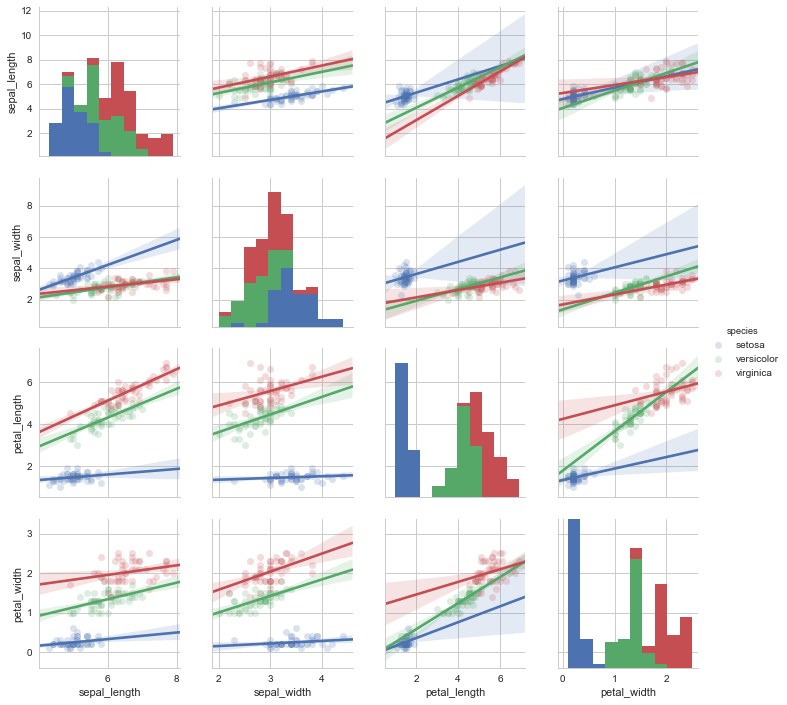

In [135]:
iris = seaborn.load_dataset("iris")      # ukazka ako su vidiet vztahy tu, ale pri nasom vobec
seaborn.pairplot(iris, hue="species", kind='reg', plot_kws={'scatter_kws': {'alpha': 0.2}})

# observation of people according to their race and working hours per week

In [ ]:
sns.swarmplot(x="race", y="hours-per-week", data= train, color="w", alpha=.5);